# `EDA FOR SPEEDTEST DATA`

** The `Dataset` consist of data regarding various Service Provider like `JIO,VODAPHONE`,etc and their `Signal_strength and Data Speed`**

The Dataset has following Attributes:


1. Service Provider `
2. Technology
3. Test_type
4. Data Speed
5. Signal_Strength
6. LSA 


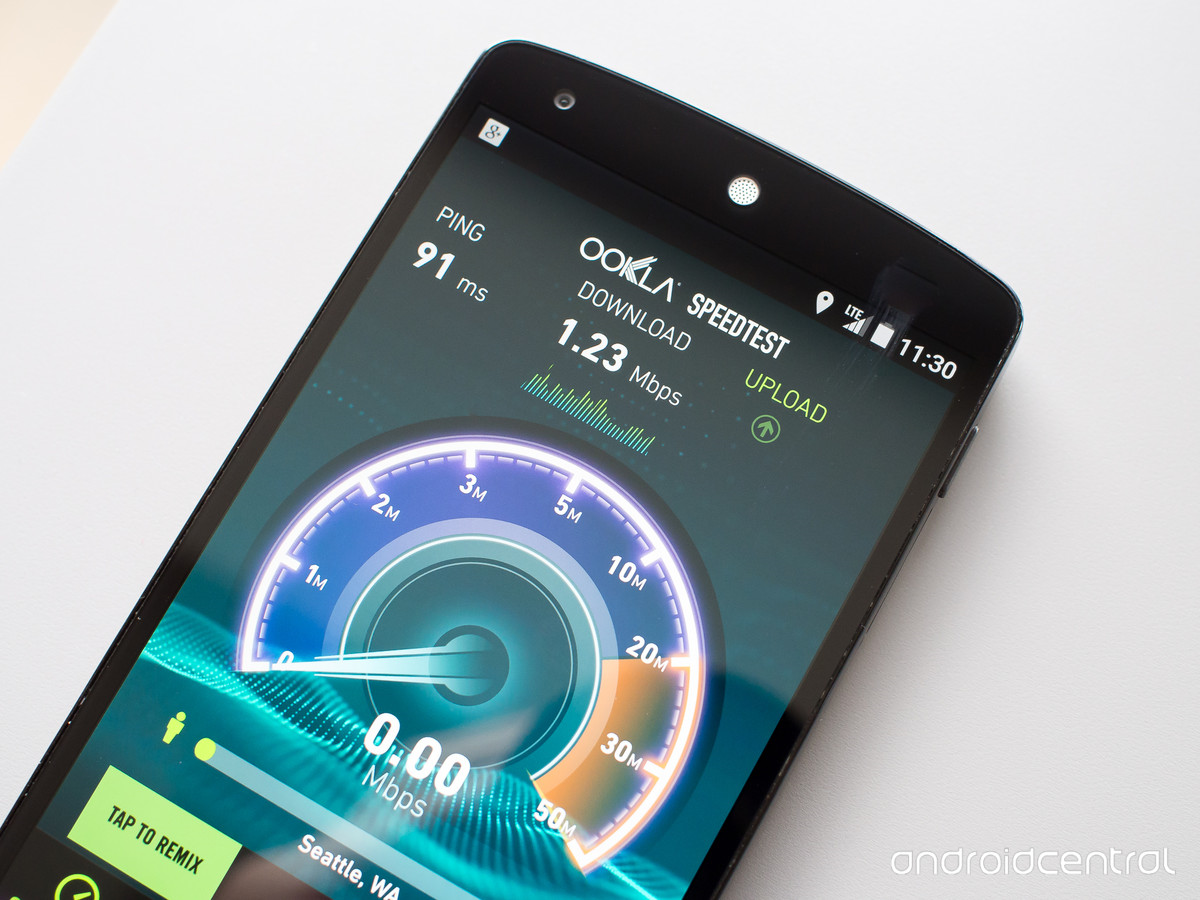

# `1. GET DATA`

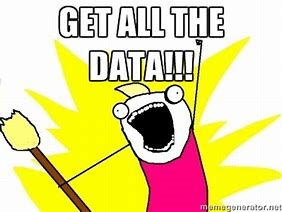

In [1]:
#Directory information
FILE_ID = "march18_myspeed.csv"
FOLDER  = "datasets\\speedtest"

In [2]:
#Necessary Dependencies
import warnings
warnings.simplefilter("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

def load_data(path,folder=FOLDER):
    path = os.path.join(folder,path)
    return pd.read_csv(path)

In [3]:
df = load_data(FILE_ID)
df.head(2)

,Service Provider,Technology,Test_type,Data Speed(Mbps),Signal_strength,LSA
0,JIO,4G,Upload,7.30,-63,Andhra Pradesh
1,JIO,4G,Upload,7.31,-65,Andhra Pradesh


# ** ` 2. PREPROCESSING` **


      
## *a. DATA CLEANING*

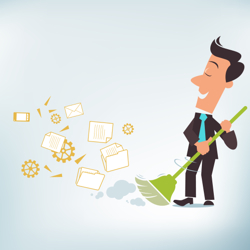

In [4]:
# for filling missing values-- Numeric data 
def fill_median(data,col,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    med=df[col].median()
    df[col]=df[col].fillna(med)
    
    return df,med

def fill_default(data,col,value=0,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    df[col].fillna(val)
    return df,val

#To Add/ Remove new columns
def add_column(data,col,value,copy=False,):
    df=data
    if copy is True:
        df=data.copy()
    df.assign(col=value)
    
def drop_column(data,columns,copy=False):
    df=data
    if copy is True:
        df=data.copy()
        
    for i in columns:
        df.drop(i,axis=1,inplace=True)
    return df


def add_colum(data,col,value,loc=1,copy=False):
    df=data
    if copy is True:
        df=data.copy()
    df.insert(loc,col,value)
    
def dropna(data,column,copy=False):
    """
    all rows with nan based on columns values

    """
    df = data
    if copy is True:
        df = data.copy()
    return df [ df[column].isnull()]

# **Note**
*The Column **`Signal Strength`** contains more than 10000 values with **`na`** making it quite unnecssary feature for any use.*

In [5]:
df=drop_column(df,columns=["Signal_strength"]) 

## *b.HANDLING CATEGORICAL AND TEXT ATTRIBUTE*

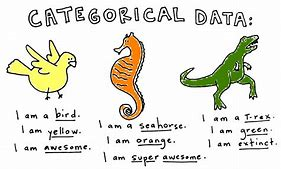

In [6]:
#Encoding Categorical Data into Numeric Data
from sklearn.preprocessing import LabelEncoder
def encode_category(data,columns,copy=False):
    meta=dict()
    X=data
    if copy is True:
        X=data.copy()
    lb_make = LabelEncoder()
    for col in columns:
        X[col] = lb_make.fit_transform(X[col])
        meta[col]=list(lb_make.classes_)
    return X,meta



In [7]:
df.columns

Index(['Service Provider', 'Technology', 'Test_type', 'Data Speed(Mbps)',
       'LSA'],
      dtype='object')

In [8]:
df.head(2)

,Service Provider,Technology,Test_type,Data Speed(Mbps),LSA
0,JIO,4G,Upload,7.30,Andhra Pradesh
1,JIO,4G,Upload,7.31,Andhra Pradesh


In [16]:
df,metadata=encode_category(df,["Service Provider","Technology","LSA","Test_type"])

#In shows relation between various attributes and encoded labels
for i in metadata:
    print(i,metadata[i],sep="\t",end="\n\n")

Service Provider	[0, 1, 2, 3, 4, 5, 6, 7]

Technology	[0, 1]

LSA	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

Test_type	[0, 1]



## *c. FEATURE SCALING*

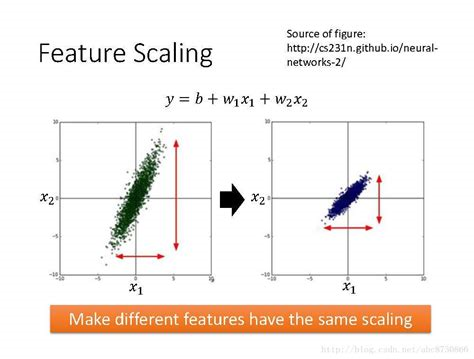

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
def standardization(clf,data,copy=False):
    """
    Should not use use for more than 1 attribute at a time
    """
    df=data
    if copy is True:
        df=data.copy()
        
    if data.ndim!=2:
        df=df.reshape(-1,1)
        
    clf.fit(df)
    return clf.transform(df)

def min_max(data,interval=[0,1],copy=False):
    df=data
    if copy is True:
        df = data.copy()
    limit=[ int(df.min()),int(df.max())]
    df= ((interval[1] - interval[0])/(limit[1] - limit[0]) )*(df-limit[1])+interval[1]
    return df


In [19]:
df["Data Speed(Mbps)"]=min_max(df["Data Speed(Mbps)"],copy=True)
df.head(4)

,Service Provider,Technology,Test_type,Data Speed(Mbps),LSA
0,5,1,1,0.053285,0
1,5,1,1,0.053358,0
2,5,1,1,0.050438,0
3,7,1,0,0.056423,13


## *d.CORRELATION AND DESCRIPTION OF FEATURES*

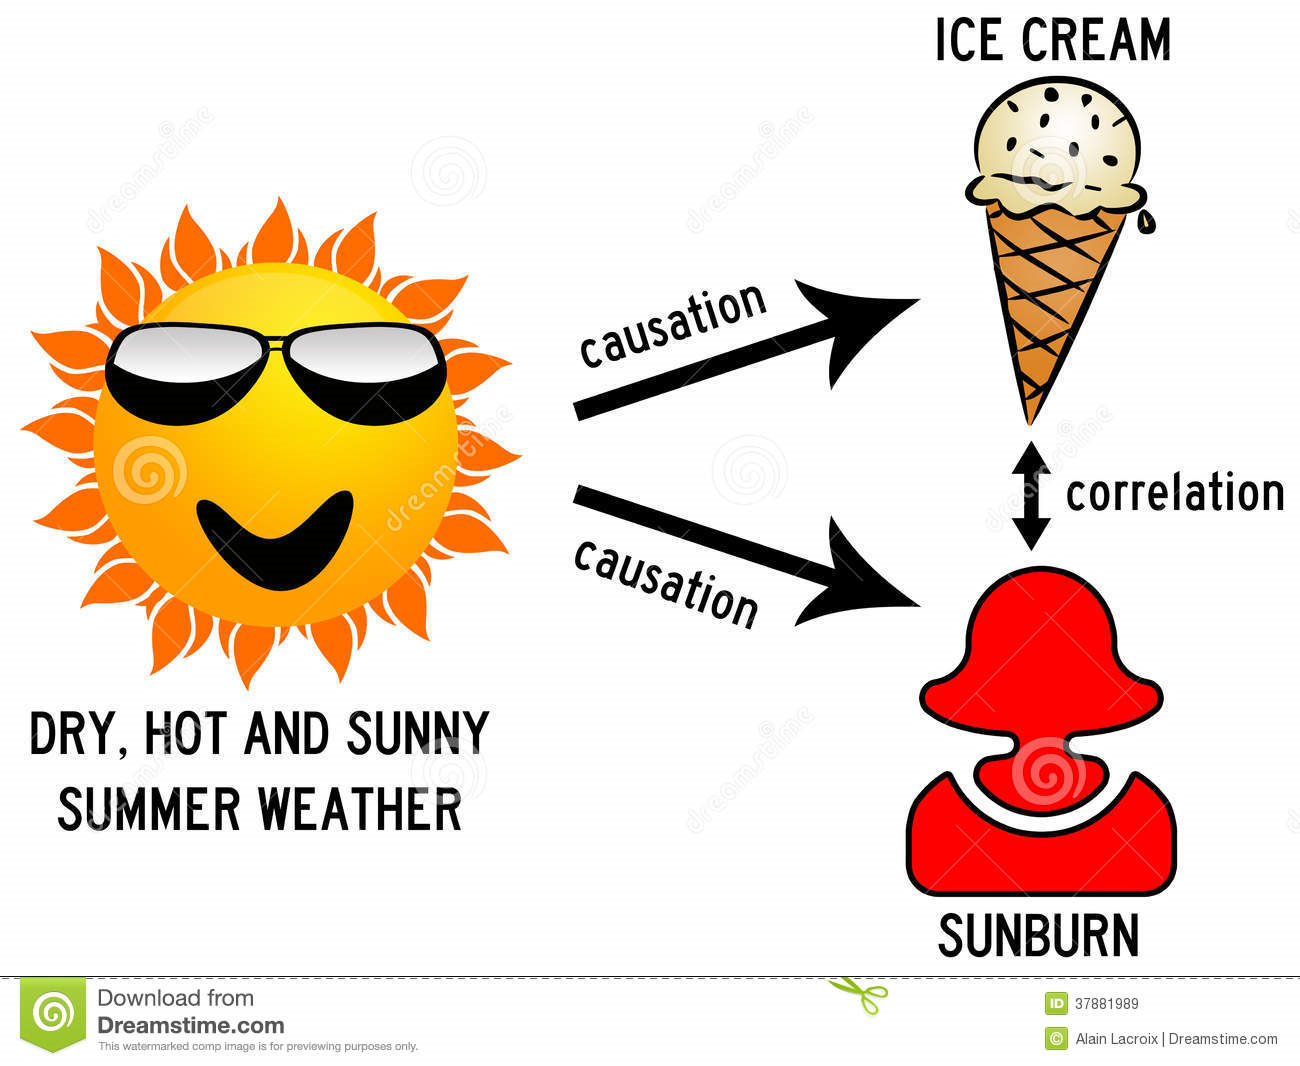

In [20]:
df[ ["Service Provider","Test_type","Data Speed(Mbps)","LSA"] ].corr()

,Service Provider,Test_type,Data Speed(Mbps),LSA
Service Provider,1.000000,0.000069,0.099530,0.026003
Test_type,0.000069,1.000000,-0.297346,-0.000054
Data Speed(Mbps),0.099530,-0.297346,1.000000,-0.012429
LSA,0.026003,-0.000054,-0.012429,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322972 entries, 0 to 1322971
Data columns (total 5 columns):
Service Provider    1322972 non-null int64
Technology          1322972 non-null int64
Test_type           1322972 non-null int64
Data Speed(Mbps)    1322972 non-null float64
LSA                 1322972 non-null int64
dtypes: float64(1), int64(4)
memory usage: 50.5 MB


#                                             END

**`Any Suggestion and advice related for futhure improvement is always welcome.`**